In [1]:
names = open('names.txt').read().splitlines()


In [2]:
chars = sorted(list(set(''.join(names))) + ['.'])


In [3]:
stoi = {character:index for index,character in enumerate(chars)}
stoi['.']
itos = {index:character for character,index in stoi.items()}

In [4]:
import torch
[names[i] for i in (torch.arange(-10,-1)).tolist()]

['zuber',
 'zubeyr',
 'zyell',
 'zyheem',
 'zykeem',
 'zylas',
 'zyran',
 'zyrie',
 'zyron']

In [5]:
block_size = 3 

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] 

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.nelement(), Y.nelement())
  return X, Y

import random
random.shuffle(names)
n1 = int(0.8*len(names))
n2 = int(0.9*len(names))

Xtr, Ytr = build_dataset(names[:n1])
Xdev, Ydev = build_dataset(names[n1:n2])
Xte, Yte = build_dataset(names[n2:])

547248 182416
68538 22846
68652 22884


In [6]:
W1 = torch.randn((6,100),requires_grad=True)
b1 = torch.randn((100),requires_grad=True)
W2 = torch.randn((100,27),requires_grad=True)
b2 = torch.randn((27),requires_grad=True)
C = torch.randn((27,2),requires_grad=True)
parameters = [C,W1,b1,W2,b2]
y = sum(p.nelement() for p in parameters)
y

3481

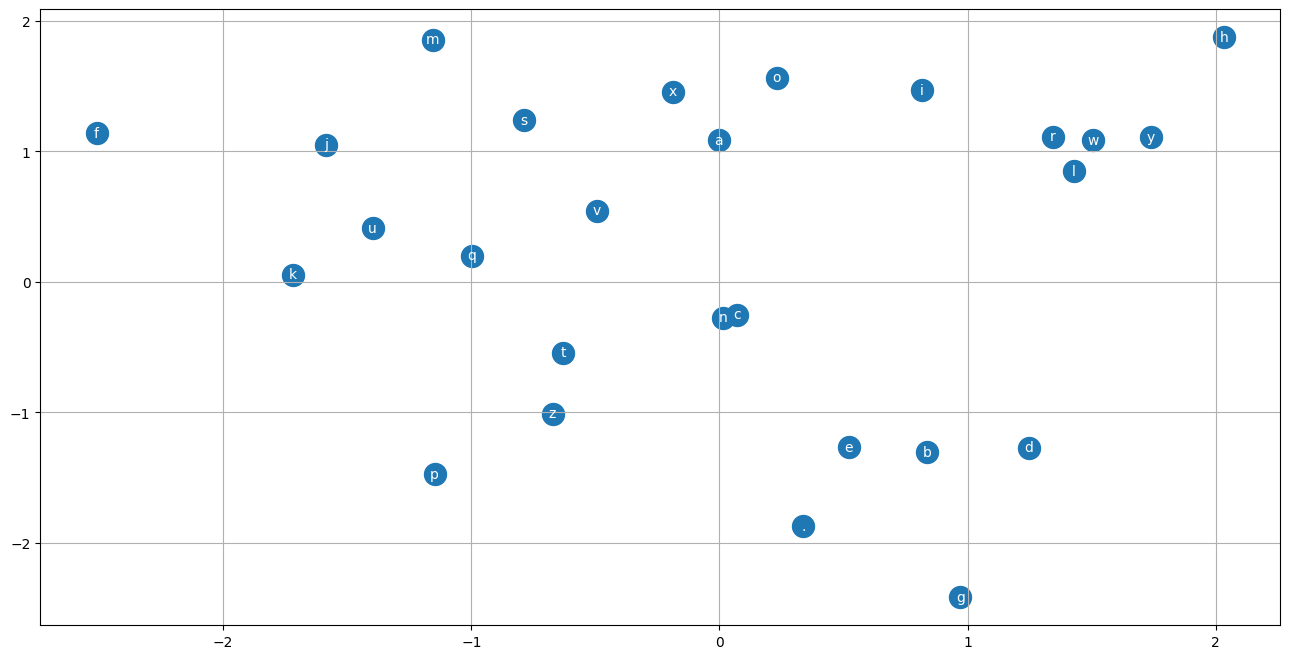

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.scatter(C[:,0].data, C[:,1].data,s=250,)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')


In [8]:
C[Xtr[torch.arange(0,512)]].shape

torch.Size([512, 3, 2])

In [9]:
#learning_rates_shop = torch.linspace(0.001,2.000,2000)
#losses = []
#learning_rates = []
minibatch_size = 32

for i in range(30000):
    #Forward Pass
    mini_batch_indices = torch.randint(0,Xtr.shape[0],(minibatch_size,)) 
    embedding = C[Xtr[mini_batch_indices]]
    h = torch.nn.functional.tanh(embedding.view(minibatch_size,block_size * C.shape[1]) @ W1 +b1 )
    logits = h @ W2 + b2
    loss = torch.nn.functional.cross_entropy(logits,Ytr[mini_batch_indices])
    
    
    #Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
    lr = 0.01 if i<20000 else 0.001
    for params in parameters:
        params.data += -lr * params.grad
    #losses.append(loss.item())
    #learning_rates.append(learning_rates_shop[i])
    if (not i%1000):
        print(loss.item())
    

/home/numair/.local/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


17.078563690185547
4.014002323150635
2.7688000202178955
2.272249221801758
2.756443500518799
2.957744598388672
2.7376768589019775
2.6093921661376953
2.774218797683716
2.821479082107544
2.860823154449463
2.4772696495056152
2.534959554672241
2.569324254989624
2.5772273540496826
2.514418125152588
2.4069204330444336
2.455336093902588
2.4362082481384277
2.4382965564727783
2.621091365814209
2.19472336769104
2.1454484462738037
2.614396572113037
2.4300122261047363
2.9206607341766357
2.4346137046813965
2.501995086669922
2.121307134628296
2.586498737335205


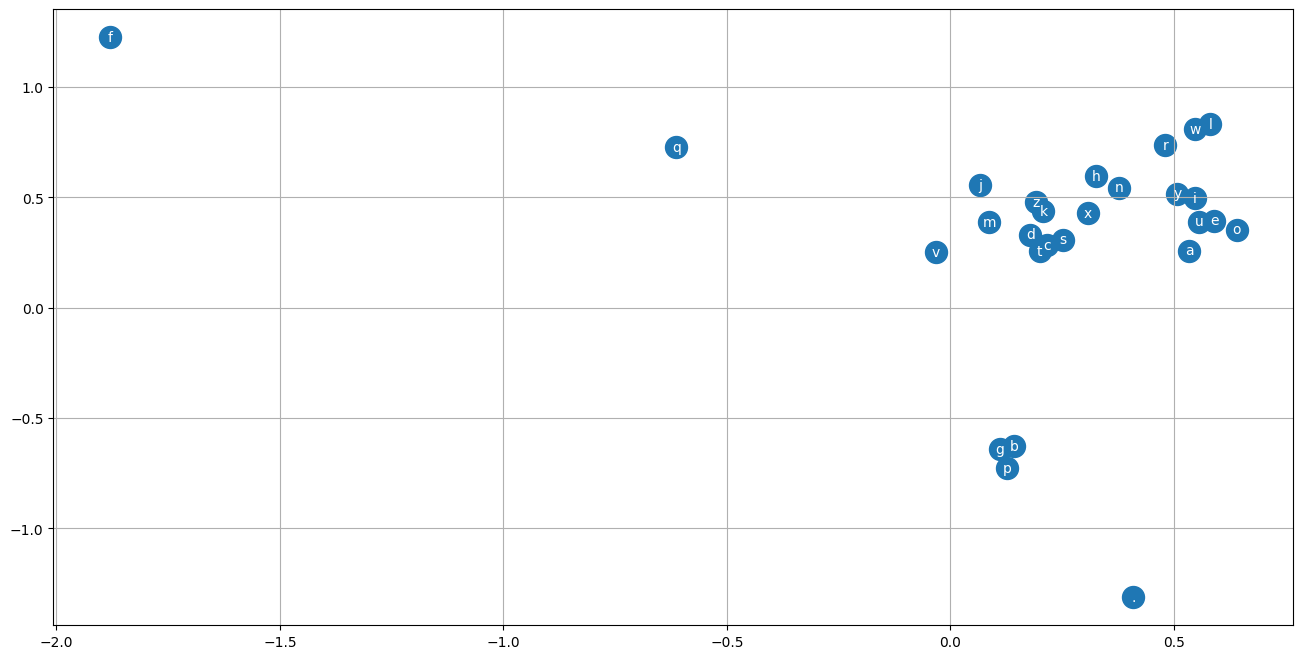

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.scatter(C[:,0].data, C[:,1].data,s=250,)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')


In [31]:
# predictions

for i in range(10):
    out = []
    context = [0] * block_size 
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = torch.nn.functional.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=None).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

hiah.
biinted.
macele.
ayy.
zare.
kuran.
birly.
ndli.
naval.
kyo.
